# NLP Assignment - 1 Text Processing of Tom Sawyer

First we will import the required libraries and read all the text from the file.

In [1]:
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

with open("tom.txt", 'r') as content_file:
    content = content_file.read()
    content=content.lower()

Then using word tokenization we split the whole content into words.

In [2]:
words = word_tokenize(content)

Now we count how many times each word appears in the text. For this we use Counter, a special subclass of dictionary. Then we delete some keys as mentioned in the list del_list 

In [24]:
cnt= Counter()

for j in words:
    cnt[j]+=1
    
del_lst=[',','.',"'s",'"','“','”',':','--',"'"]
for i in del_lst:
    del cnt[i]
    
#print(cnt)  #Remove the # and run the cell to see how the dictionary actually looks like

Now we wil count the number of types and tokens and then calculate TTR for this text.

In [4]:
typ=0     # No of types
token=0   # No of tokens

typ = len(cnt)
for i in cnt.keys():
    token+=cnt[i]

print ("No of types :",typ)
print ("No of tokens :",token)
print("TTR value :" ,typ/token)

No of types : 8014
No of tokens : 74642
TTR value : 0.10736582621044452


## Zipf's law

### 1. Frequncy is inversely proportional to rank

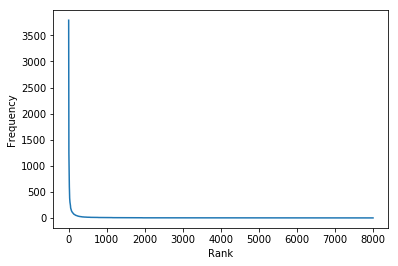

In [34]:
rank=range(1,len(cnt)+1)
frequency=sorted(cnt.values())[::-1]

fr=[]
for i in range(len(rank)):
    fr.append(frequency[i]*rank[i])

#print(fr)
    
plt.plot(rank,frequency)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

### Heap's Law can also be stated in that the product of frequency and rank = k is a constant. We have to find this k.

In [40]:
from scipy.optimize import curve_fit
def zipfunc(x,k):
    return k/x

init_guess=[8000]
best_val, covar = curve_fit(zipfunc, rank, frequency, p0=init_guess)
print("k found : ",best_val[0])

k found :  5122.437294237055


Now using the k found we plot the same function for linearly spaced data. The curve is as shown. We see that the two curves are almost same.

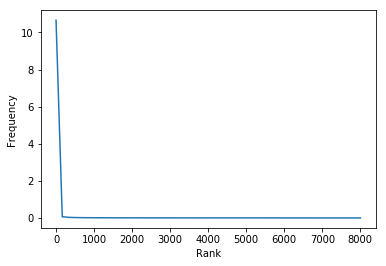

In [47]:
from numpy import linspace
x=linspace(1,8001)
y=[zipfunc(i,best_vals[0]) for i in x]
plt.plot(x,y)
plt.xlabel("Rank")
plt.ylabel('Frequency')
plt.show()

### 2. Zipf's law for lengths. Word Length is inversely proportional to frequency

Here we are going to add the frequency of all the words having same length and then plot the graph between length and frequency

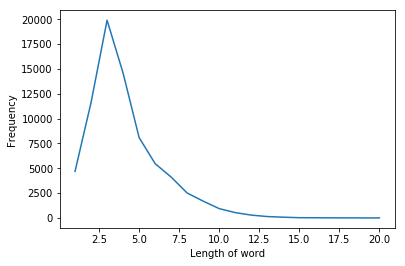

In [32]:
length_dict={}
for i in cnt.keys():
    x=len(i)
    if x not in length_dict.keys():
        length_dict[x]=cnt[i]
    else:
        length_dict[x]+=cnt[i]

length=sorted(length_dict.keys())
freq=[]
for i in length:
    freq.append(length_dict[i])

plt.plot(length,freq)
plt.xlabel('Length of word')
plt.ylabel('Frequency')
plt.show()

A hyberblic type curve shows the area where zipf's law for lengths is being followed.Thus we see that words whose lengths are greater than 4 are following this law.

### 3. Zipf's law for meanings. Number of meanings of a word is proportional to the root of it's frequency

Words for which we will test this law. Format : word wordFreq

made 87, place 58, lay 46, being 38, rest 32, silence 32, voice 30, book 29, light 28, master 27, fire 26, river 24, rose 21, foot 19, bear 15, dreams 11, splendid 7, shovel 6, deaf 5, literature 2, america 2, architecture 1

In [12]:
meanings={'made':2,'place':4,'lay':3,'being':2,'rest':4,'silence':2,'voice':4,'book':7,'light':6,'master':7,'fire':4,'rose':6,'foot':5,'bear':4,'dreams':3,'splendid':2,'shovel':2,'deaf':2,'literature':1,'america':1,'architecture':1}

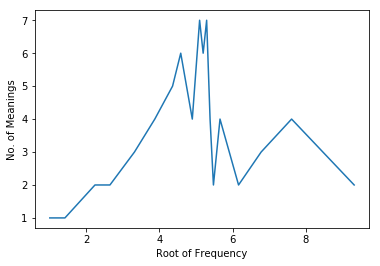

In [44]:
wordMeaning=[2,4,3,2,4,2,4,7,6,7,4,6,5,4,3,2,2,2,1,1,1]
wordFreq=[87,58,46,38,32,30,29,28,27,26,24,21,19,15,11,7,6,5,2,2,1]
rootWordFreq=[i**0.5 for i in wordFreq]

#print(len(wordMeaning),len(wordFreq))
plt.plot(rootWordFreq,wordMeaning)
plt.xlabel("Root of Frequency")
plt.ylabel("No. of Meanings")
plt.show()


For words having high frequency (more than equal to 6) the graph is not a straight line. However for lower frequency words (less than 6), zipf's law is followed. The plot is as shown below, where we can see the graph is almost a straight line.

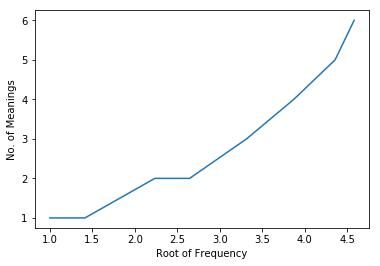

In [45]:
plt.plot(rootWordFreq[11:],wordMeaning[11:])
plt.xlabel("Root of Frequency")
plt.ylabel("No. of Meanings")
plt.show()

## Heap's Law

### Heap's law states that |V|=kN^beta where |V| is vocabulary size and N is size of total corpus.

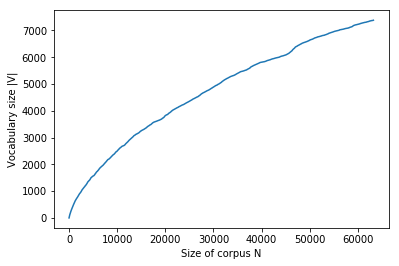

In [30]:
addlength=100
end=0
vocab=[0]    # Vocabulary Size or |V|
size=[0]     # Size of entire corpus or N

while (end<74600):
    cn=Counter()
    part=words[0:end]
    for j in part:
        cn[j]+=1
    
    del_lst=[',','.',"'s",'"','“','”',':','--',"'"]
    for i in del_lst:
        del cn[i]
    
    vocab.append(len(cn))
    tot=0
    for i in cn.keys():
        tot+=cn[i]
    size.append(tot)
    end+=100
    

plt.plot(size,vocab)
plt.xlabel("Size of corpus N")
plt.ylabel('Vocabulary size |V|')
plt.show()


Now we use scipy to fit k and beta. We provide an initial guess of k=50 and beta=0.5

In [8]:
from scipy.optimize import curve_fit
def heapfunc(x,k,beta):
    return k*(x**beta)

init_guess=[50,0.5]
best_vals, covar = curve_fit(heapfunc, size, vocab, p0=init_guess)
print("k found :",best_vals[0])
print("beta found :",best_vals[1])


k found : 10.66001422136562
beta found : 0.5936779950139472


Now using the k and beta found we plot the same function for linearly spaced data. The curve is as shown. We see that the two curves are almost same.

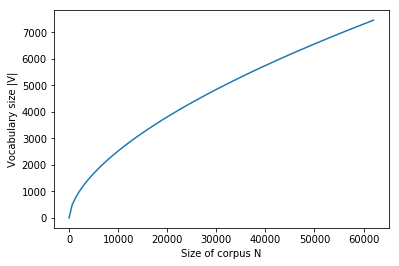

In [31]:
from numpy import linspace
x=linspace(0,62000,100)
y=[heapfunc(i,best_vals[0],best_vals[1]) for i in x]
plt.plot(x,y)
plt.xlabel("Size of corpus N")
plt.ylabel('Vocabulary size |V|')
plt.show()